Question 1

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 22s 0us/step


In [3]:
x_train = x_train / 255.0
x_test = x_test / 255.0

print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [4]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten

model = Sequential()
model.add(Conv2D(3, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(3, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 3)      │            84 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 3)      │            84 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 588)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │        58,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 60,078 (234.68 KB)

 Trainable params: 60,078 (234.68 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'], run_eagerly=True)

In [6]:
import tensorflow as tf
history = model.fit(x_train, tf.keras.utils.to_categorical(y_train, num_classes=10), epochs=10, batch_size=64, validation_split=0.1)

Epoch 1/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 86s 122ms/step - accuracy: 0.2855 - loss: 1.9405 - val_accuracy: 0.4228 - val_loss: 1.5907
Epoch 2/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 87s 123ms/step - accuracy: 0.4341 - loss: 1.5711 - val_accuracy: 0.4436 - val_loss: 1.5647
Epoch 3/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 92s 131ms/step - accuracy: 0.4711 - loss: 1.4837 - val_accuracy: 0.4678 - val_loss: 1.4688
Epoch 4/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 140s 128ms/step - accuracy: 0.4942 - loss: 1.4138 - val_accuracy: 0.4900 - val_loss: 1.4280
Epoch 5/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 88s 125ms/step - accuracy: 0.5178 - loss: 1.3608 - val_accuracy: 0.4932 - val_loss: 1.4077
Epoch 6/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 90s 128ms/step - accuracy: 0.5308 - loss: 1.3235 - val_accuracy: 0.5136 - val_loss: 1.3743
Epoch 7/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 93s 132ms/step - accuracy: 0.5499 - loss: 1.2730 - val_accuracy: 0.5116 - val_loss: 1.3574
Epoch 8/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 92s 130ms/step - accuracy: 0.5562 - loss: 

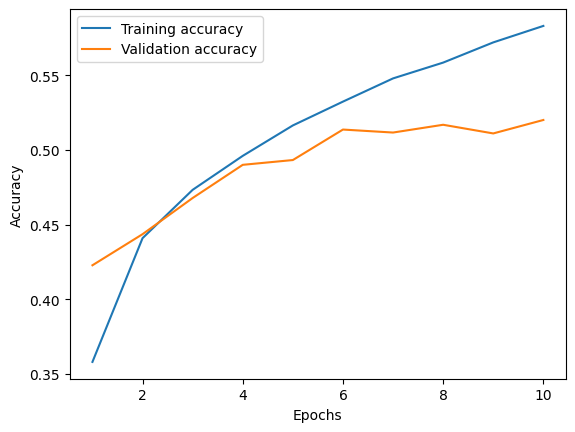

In [7]:
accuracy = history.history['accuracy']
valid_accuracy = history.history['val_accuracy']
epochs = [1,2,3,4,5,6,7,8,9,10]
plt.figure()
plt.plot(epochs, accuracy, label='Training accuracy')
plt.plot(epochs, valid_accuracy, label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

Question 2

In [8]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

data = load_breast_cancer()
X = data.feature_names
y = data.target

features = ["worst compactness", "worst concavity", "worst area"]
X = data.data[:, [list(X).index(i) for i in features]]

In [10]:
from sklearn.model_selection import train_test_split
#using 70-30 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
#part A

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

model = SVC(kernel='linear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9649122807017544


In [12]:
#part B

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

model = SVC(kernel='rbf', C = 2 )
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9473684210526315
